#### Importe de datos

In [1]:
import numpy as np
import tensorflow as tf
import math
from matplotlib import pyplot as plt
from urllib import request
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

In [2]:
print(dataset.shape)
x = dataset[:, 0:2]
y = dataset[:, 2:]

(100, 3)


#### Ej 1

In [4]:
# Normalizo para que converja más fácilmente

media = x.mean(axis = 0)
varianza = x.std(axis = 0)
x_normalizada = (x - media)/varianza

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=10),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))
hist = model.fit(x=x_normalizada, y=y, batch_size = 100, epochs=1000,callbacks=[es])

#### Ej 2

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=10),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics = ['accuracy'])
hist = model.fit(x=x_normalizada, y=y, batch_size = 100, epochs=1000,callbacks=[es])

Epoch 1/1000
1/1 [==============================] - 0s 262ms/step - loss: 0.5931 - accuracy: 0.6300
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.3238 - accuracy: 0.8800
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2313 - accuracy: 0.8800
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2196 - accuracy: 0.8700
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2151 - accuracy: 0.8800
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2127 - accuracy: 0.8900
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2110 - accuracy: 0.8800
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2096 - accuracy: 0.8800
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2086 - accuracy: 0.8800
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2077 - accuracy: 0.8800
Epoch 11/1000
1/1

In [28]:
prediction = model.predict(x=x_normalizada)
prediction = np.where(prediction > 0, 1, 0) # suponemos que las predicciones mayores a 0 son aprobados
print("Según la predicción, hay " + str((prediction).sum()) + " aprobados.")
print("El porcentaje de predicciones correctas es del " +  str((prediction == y).sum() / len(prediction) * 100)+ "%.")

4/4 [==============================] - 0s 2ms/step
Según la predicción, hay 61 aprobados.
El porcentaje de predicciones correctas es del 89.0%.


Esto tiene sentido si miramos la métrica "accuracy" en el entrenamiento del modelo.

#### Ej 3

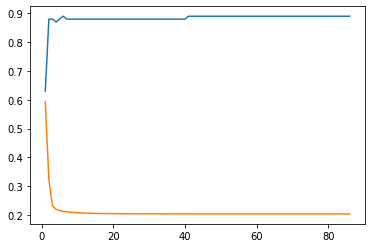

In [38]:
losses = hist.history['loss']
epochs = [i for i in range(1, len(losses) + 1)]
prediction_percentage = hist.history['accuracy']

plt.plot(epochs, prediction_percentage)
plt.plot(epochs, losses)

plt.show()

#### Ej 4

In [40]:
alumno_normalizado = ((np.array([63, 55]) - media) / varianza).reshape(1, 2)
alumno_prediccion = model.predict(x = alumno_normalizado)
print(f"Un alumno con notas 63 y 55 " + ("si" if alumno_prediccion > 0 else "no") + " va a aprobar")

1/1 [==============================] - 0s 18ms/step
Un alumno con notas 63 y 55 no va a aprobar


#### Ej 5

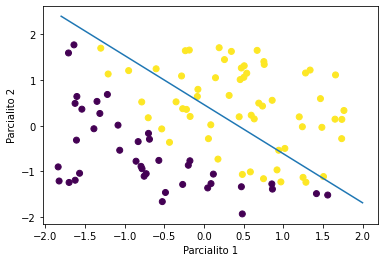

In [41]:
params = model.get_weights()
w1 = params[0][0][0]
w2 = params[0][1][0]
b = params[1][0]

x1 = np.linspace(-1.8, 2, 70)
y1 = -((x1 * w1) - b) / w2

plt.plot(x1, y1)
plt.scatter(x_normalizada[:, 0], x_normalizada[:, 1], c=dataset[:, 2])
plt.xlabel("Parcialito 1")
plt.ylabel("Parcialito 2")

plt.show()